In [8]:
import numpy as np
import cv2
import yaml
from math import *
import os

In [9]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

chessboardsize = (11,7)
frame_size = (1024, 576)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((chessboardsize[0] * chessboardsize[1],3), np.float32)
objp[:,:2] = np.mgrid[0:chessboardsize[0],0:chessboardsize[1]].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

## Corners of chessboard Images

In [10]:
import glob
import matplotlib.pyplot as plt
images = glob.glob('data\imgs\leftcamera\*.png')

for image in images:
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, chessboardsize, None)

    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        #Draw chess board corners
        cv2.drawChessboardCorners(img, chessboardsize, corners2, ret)
            



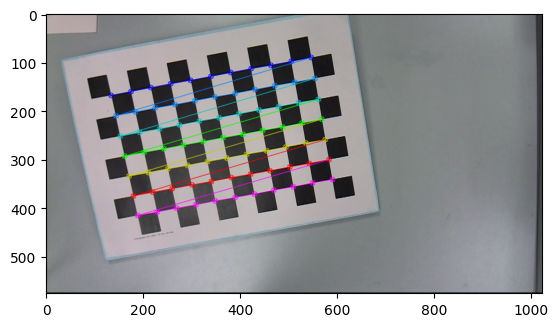

In [11]:
plt.imshow(img)

In [12]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [13]:
mtx

array([[718.91784514,   0.        , 523.81794096],
       [  0.        , 729.96764008, 285.67599006],
       [  0.        ,   0.        ,   1.        ]])

In [6]:
height, width = img.shape[:2]
camMatNew, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (width,height), 1 , (width,height))
imgUndistort = cv2.undistort(img, mtx, dist, camMatNew)

In [7]:
dist

array([[ 3.10654667e-02, -1.79710419e-01,  8.74245496e-04,
         1.77051639e-04,  2.13729056e-01]])

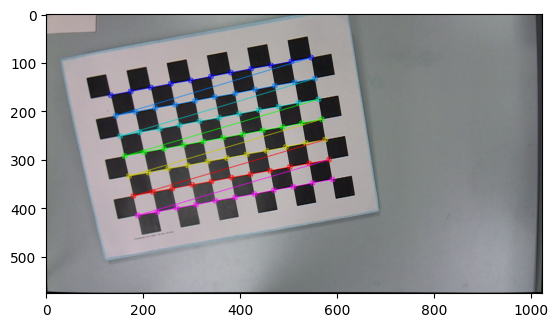

In [8]:
plt.imshow(imgUndistort)

In [19]:
R, _ = cv2.Rodrigues(rvecs[0])
print("Rotation matrix:", R)

Rotation matrix: [[ 0.99974349 -0.02142806  0.00733406]
 [ 0.02113243  0.99904446  0.03825685]
 [-0.00814682 -0.03809205  0.99924102]]


In [22]:
img = cv2.imread('data/imgs/leftcamera/Im_L_1.png')

In [41]:
height, width = img.shape[:2]
camMatNew, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (width,height), 1 , (width,height))
imgUndistort = cv2.undistort(img, mtx, dist, camMatNew)

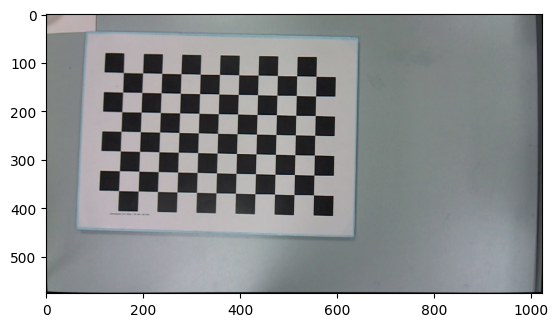

In [42]:
plt.imshow(imgUndistort)

In [37]:
dict(camMatNew)

ValueError: dictionary update sequence element #0 has length 3; 2 is required